<a href="https://colab.research.google.com/github/1umesh1/UsingPythonForResearch/blob/master/face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D


In [ ]:
import os   
os.environ['KAGGLE_USERNAME']="umeshkarki"
os.environ['KAGGLE_KEY']="6048db719fe671cb46e6eb8bb05c8a53"

In [ ]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

covid-face-mask-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
replace New Masks Dataset/Test/Mask/2070.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace New Masks Dataset/Test/Mask/2072.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace New Masks Dataset/Test/Mask/2072.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace New Masks Dataset/Test/Mask/2083.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
main_dir='/content/New Masks Dataset'
train_dir=os.path.join(main_dir,"Train") 
test_dir=os.path.join(main_dir,"Test")
valid_dir=os.path.join(main_dir,"Validation")

train_mask_dir = os.path.join(train_dir,"Mask")
train_nomask_dir=os.path.join(train_dir,"Non Mask")


In [ ]:
train_mask_names=os.listdir(train_mask_dir)
print (train_mask_names[:10])

train_nomask_names=os.listdir(train_nomask_dir)
print (train_nomask_names[:10])

['0714.jpg', '0837.jpg', '0066.jpg', '0693.jpg', '0725.jpg', '1112.jpg', '0760.jpg', '0777.jpg', '1492.jpg', '0115.jpg']
['307.jpg', '99.jpg', '331.jpg', '11.jpg', '317.jpg', '193.jpg', '204.jpg', '267.jpg', '187.jpg', '42.jpg']


# Image Valuation


## Visualising 8 images for mask/nomask

['/content/New Masks Dataset/Train/Mask/0714.jpg', '/content/New Masks Dataset/Train/Mask/0837.jpg', '/content/New Masks Dataset/Train/Mask/0066.jpg', '/content/New Masks Dataset/Train/Mask/0693.jpg', '/content/New Masks Dataset/Train/Mask/0725.jpg', '/content/New Masks Dataset/Train/Mask/1112.jpg', '/content/New Masks Dataset/Train/Mask/0760.jpg', '/content/New Masks Dataset/Train/Mask/0777.jpg']
['/content/New Masks Dataset/Train/Non Mask/307.jpg', '/content/New Masks Dataset/Train/Non Mask/99.jpg', '/content/New Masks Dataset/Train/Non Mask/331.jpg', '/content/New Masks Dataset/Train/Non Mask/11.jpg', '/content/New Masks Dataset/Train/Non Mask/317.jpg', '/content/New Masks Dataset/Train/Non Mask/193.jpg', '/content/New Masks Dataset/Train/Non Mask/204.jpg', '/content/New Masks Dataset/Train/Non Mask/267.jpg']


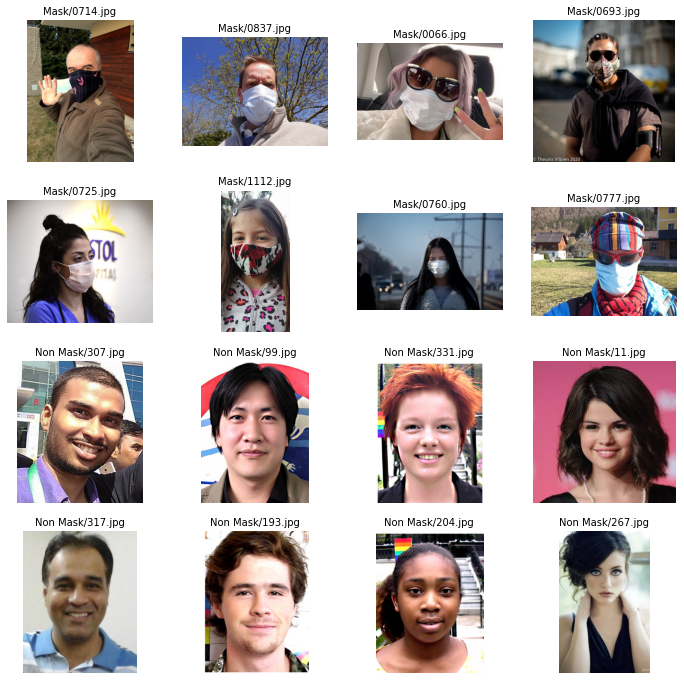

In [ ]:
import matplotlib.image as mpimg
nrows=4
ncols=4
plt.figure(figsize=(12,12))

mask_pic=[]
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

  nomask_pic=[]
for i in train_nomask_names[0:8]:
    nomask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic)
print(nomask_pic)

merged_list=mask_pic+nomask_pic

for i in range(0,len(merged_list)):
  data=merged_list[i].split('/',4)[4]
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  image=mpimg.imread(merged_list[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')

plt.show()


##Data Augmentation


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 rotation_range=40,
                                 horizontal_flip=True
                                 )

test_datagen=ImageDataGenerator(rescale=1./255)
validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode='binary'
                                                  )
test_generator=test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode='binary'
                                                  )
valid_generator=validation_datagen.flow_from_directory(valid_dir,
                                                  target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode='binary'
                                                  )


Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

In [ ]:
model=Sequential()
 #relu-non linearty
 # input_shape is RGB(3)
 #32 different filters
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
# size reduce to half
model.add(MaxPooling2D(pool_size=(2,2)))
#Add drop out layer
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
# size reduce to half
model.add(MaxPooling2D(pool_size=(2,2)))
#Add drop out layer
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
#Add drop out layer
model.add(Dropout(0.5))

#output layer
model.add(Dense(1,activation='sigmoid'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)            

#Train and Evaluate Performance of Model

In [ ]:
# classes 2= >loss='binary_crossentropy'
# More than 2 classes => 'categorical_crossentropy'
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])
# train all the model
history= model.fit(train_generator,
                   epochs=30,
                   validation_data=valid_generator)

Epoch 1/30
19/19 [==============================] - 12s 606ms/step - loss: 3.8828 - accuracy: 0.5333 - val_loss: 0.6931 - val_accuracy: 0.5458
Epoch 2/30
19/19 [==============================] - 11s 590ms/step - loss: 0.6783 - accuracy: 0.5533 - val_loss: 0.6930 - val_accuracy: 0.5359
Epoch 3/30
19/19 [==============================] - 11s 590ms/step - loss: 0.5707 - accuracy: 0.7500 - val_loss: 0.5068 - val_accuracy: 0.8072
Epoch 4/30
19/19 [==============================] - 11s 590ms/step - loss: 0.3872 - accuracy: 0.8367 - val_loss: 0.4715 - val_accuracy: 0.8399
Epoch 5/30
19/19 [==============================] - 11s 590ms/step - loss: 0.2990 - accuracy: 0.8950 - val_loss: 0.3608 - val_accuracy: 0.8791
Epoch 6/30
19/19 [==============================] - 11s 598ms/step - loss: 0.2724 - accuracy: 0.9050 - val_loss: 0.3383 - val_accuracy: 0.8889
Epoch 7/30
19/19 [==============================] - 11s 584ms/step - loss: 0.2905 - accuracy: 0.8967 - val_loss: 0.3278 - val_accuracy: 0.8889

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

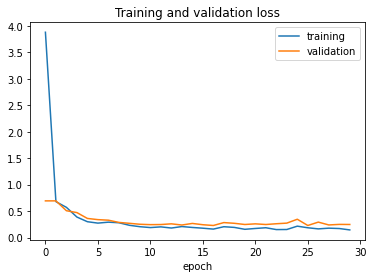

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

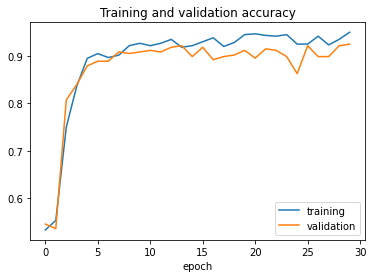

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss,test_acc=model.evaluate(test_generator)
print('test loss:{} test acc:()'.format(test_loss,test_acc))

4/4 [==============================] - 1s 216ms/step - loss: 0.1783 - accuracy: 0.9300
test loss:0.1782822459936142 test acc:()


In [ ]:
from google.colab  import files
from keras.preprocessing import image
uploaded=files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img=image.load_img(img_path,target_size=(150,150))
  images=image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  predection = model.predict(images)
  print(fname)
  if predection==0:
   print('mask')
  else:
    print('no mask')

Saving no mask.jpg to no mask (1).jpg
Saving mask.jpg to mask (2).jpg
no mask.jpg
no mask
mask.jpg
mask


In [ ]:
model.save('model.h5')